# Classifying the Stars
The task is to classify star types based on NASA's Star dataset.


You can delete all non numeric feature columns from the dataset and only consider the numeric features.

If you want to convert the columns with non-numeric data, you can check out this: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial#12.-Feature-Engineering- (you will have to install an additional package to your environment)

The data comes from https://www.kaggle.com/datasets/brsdincer/star-type-classification

In [100]:
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


set_config(print_changed_only=False)
ENCODER = ce.OrdinalEncoder

In [101]:
df = pd.read_csv('../data/Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [102]:
# split into predictors and value to be predicted
cols = df.columns.to_list()
y_var = cols.pop(cols.index('Type'))
x = df[cols]
y = df[y_var]

# encode categorical data using the OrdinalEncoder
encoder = ENCODER(cols=['Color', 'Spectral_Class'])
x_encoded = encoder.fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded.values,
    y.values,
    test_size=0.33,
    shuffle=True,
    random_state=42,
)
x_train

array([[ 7.72000e+03,  7.92000e+00,  1.34000e+00,  2.44000e+00,
         1.00000e+01,  4.00000e+00],
       [ 3.29500e+03,  9.80000e-04,  1.32000e-01,  1.71300e+01,
         1.00000e+00,  1.00000e+00],
       [ 1.30890e+04,  7.88000e+02,  5.99200e+00, -1.20000e-01,
         8.00000e+00,  3.00000e+00],
       [ 1.79200e+04,  1.11000e-03,  1.06000e-02,  1.16600e+01,
         7.00000e+00,  2.00000e+00],
       [ 1.82900e+04,  1.30000e-03,  9.34000e-03,  1.27800e+01,
         7.00000e+00,  2.00000e+00],
       [ 3.00000e+04,  2.88400e+04,  6.30000e+00, -4.20000e+00,
         8.00000e+00,  2.00000e+00],
       [ 3.13400e+03,  4.00000e-04,  1.96000e-01,  1.32100e+01,
         1.00000e+00,  1.00000e+00],
       [ 8.05200e+03,  8.70000e+00,  1.80000e+00,  2.42000e+00,
         9.00000e+00,  3.00000e+00],
       [ 1.17900e+04,  1.50000e-04,  1.10000e-02,  1.25900e+01,
         4.00000e+00,  4.00000e+00],
       [ 3.27000e+03,  1.50000e+05,  8.80000e+01, -6.02000e+00,
         1.00000e+00,  1.00

In [103]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_features=3,
)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print(f'accuracy of train data: {model.score(x_train, y_train)}')
print(f'accuracy of test data: {model.score(x_test, y_test)}')

accuracy of train data: 1.0
accuracy of test data: 1.0


Text(33.22222222222222, 0.5, 'Truth')

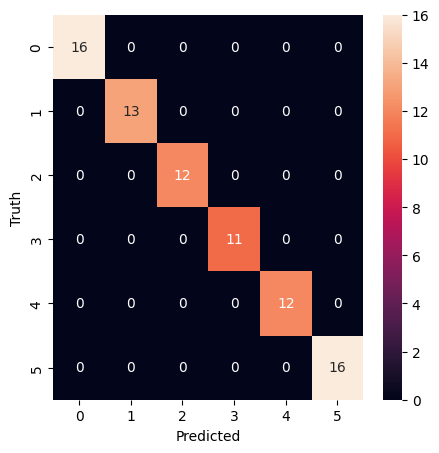

In [104]:
y_pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<AxesSubplot: xlabel='feature importance', ylabel='predictor'>

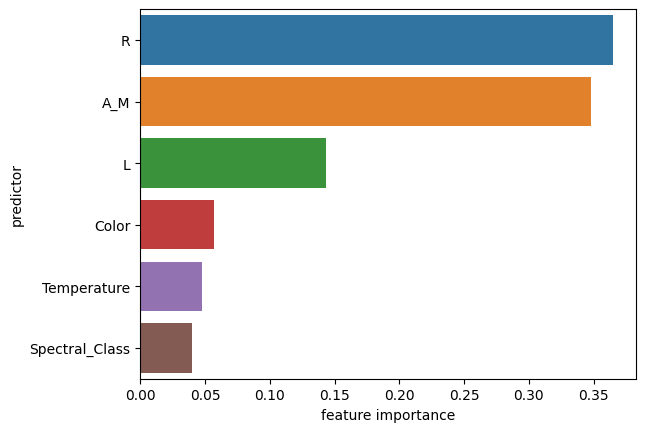

In [105]:
feature_list = x_encoded.columns.to_list()
feature_importance = pd.Series(
    model.feature_importances_,
    index=feature_list,
).sort_values(ascending=False)
x = feature_importance.to_frame().reset_index()
x.columns = ['predictor', 'feature importance']
fig, ax = plt.subplots()
sns.barplot(x='feature importance', y='predictor', data=x)

## questions

1. what does `encoder.fit_transform(x)` do?
1. why did you suggest `OrdinalEncoder` even though the data is not ordinal?
    - use `OneHotEncoder` instead?
1. why don't we train the model on all data in the end after we got the error metrics? To get the best possible model?
1. different cross validation? e.g. LOOCV?